# <center>Favio Conde</center>

### <center>D207 - Exploratory Data Analysis</center>

### <center>July 13, 2023</center>

### <center>WGU</center>

### Part A

### A1: Question for Analysis

Is there a significant difference in the mean number of doctor visits between patients that were readmitted and patients that were not readmitted?

H<sub>0</sub>: &mu;<sub>a</sub> = &mu;<sub>b</sub>

H<sub>&alpha;</sub>: &mu;<sub>a</sub> &ne; &mu;<sub>b</sub>

If H<sub>0</sub> is rejected, then this means that there isn't sufficient evidence in the data to accept the null that there is no significant difference.  If H<sub>0</sub> is accepted, then there is sufficient evidence in the data to accept the null.


### A2: Benefit from Analysis

The hospital's goal is to determine if readmission can be predicted based on conditions and factors of the patient.  By assessing if there's a correlation between the number of times the doctor visits the patient during the initial hospitalization, the hospital can determine if the process on doctor visit frequency should be standardized to reduce the readmission frequency.

### A3: Data Identification

To answer the questiono for analysis, I used the variables that capture whether a patient was readmitted within a month, and the variable capturing the number of doctor visits during the patients' initial hospitalization.

### Part B

### B1: Code

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Importing medical_clean.csv file into Jupyter
df = pd.read_csv('C:/Users/Favio/Documents/Education/WGU/MSDA/D207/PA/Files/medical_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
# Created the two group by filtering out by 'ReAdmis' ('Yes' vs. 'No'), and retrieving the 'Doc_visits'
a = df.loc[df['ReAdmis'] == 'Yes',['Doc_visits']]
b = df.loc[df['ReAdmis'] == 'No',['Doc_visits']]

In [5]:
# Reviewing statistics about each group
print(a.describe().T)
print('\n')
print(b.describe().T)


             count      mean       std  min  25%  50%  75%  max
Doc_visits  3669.0  5.012537  1.050189  1.0  4.0  5.0  6.0  8.0


             count      mean       std  min  25%  50%  75%  max
Doc_visits  6331.0  5.012004  1.043227  1.0  4.0  5.0  6.0  9.0


In [6]:
# Calculating t-statistic and p-value
t_stat, p_value = stats.ttest_ind(a,b)

print('The t-statistic is', t_stat, 'and the p-value is', p_value)

The t-statistic is [0.02456618] and the p-value is [0.98040148]


The code than I ran in B1 is from Dr. Sewell's Episode 2 webinar on EDA

### B2: Output

In [7]:
# Calculating t-statistic and p-value
stats.ttest_ind(a,b)

TtestResult(statistic=array([0.02456618]), pvalue=array([0.98040148]), df=array([9998.]))

Based on the calculated p-value of 0.98, it is significantly higher than 0.05 so we fail to reject the null hypothesis.  This is confirmed in the code  in section 'B1' that uses the '.describe().T' function, where the mean for  both group a and b are very close.

### B3: Justification

I selected the t-test analysis technique because I have one continuous and one categorical variable, and I am measuring significant difference in the mean value.  The two sample t-test determine if two separatte samples have equal means.

### C: Univariate Statistics

### C1: Visual of Findings



In [8]:
df['Children'].describe().T

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

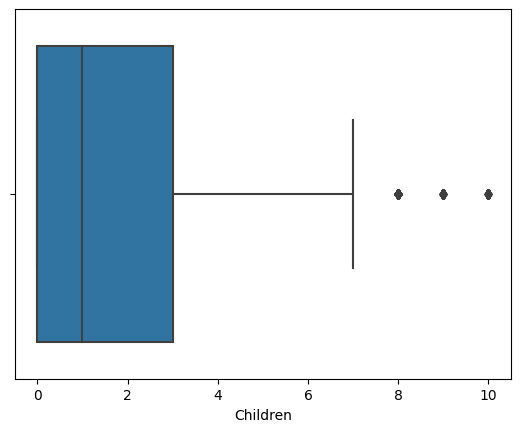

In [9]:
sns.boxplot(data=df, x='Children');

In [10]:
df['Age'].describe().T

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

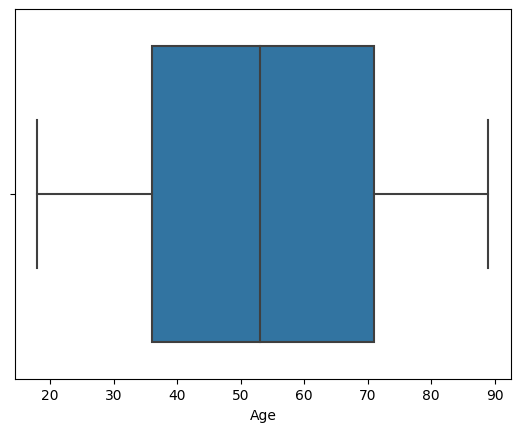

In [11]:
sns.boxplot(data=df, x='Age');

In [12]:
df['ReAdmis'].describe().T

count     10000
unique        2
top          No
freq       6331
Name: ReAdmis, dtype: object

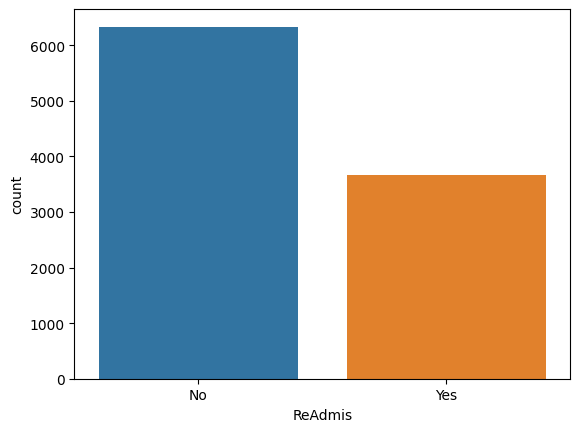

In [13]:
sns.countplot(data=df, x='ReAdmis');

In [14]:
df['Gender'].describe().T

count      10000
unique         3
top       Female
freq        5018
Name: Gender, dtype: object

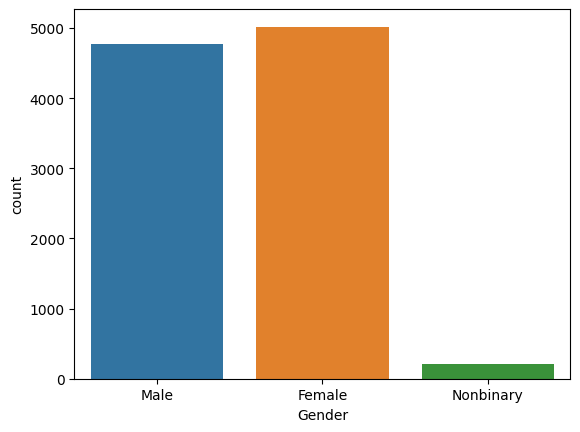

In [15]:
sns.countplot(data=df, x='Gender');

## D: Bivariate Statistics

### D1: Visual of Findings

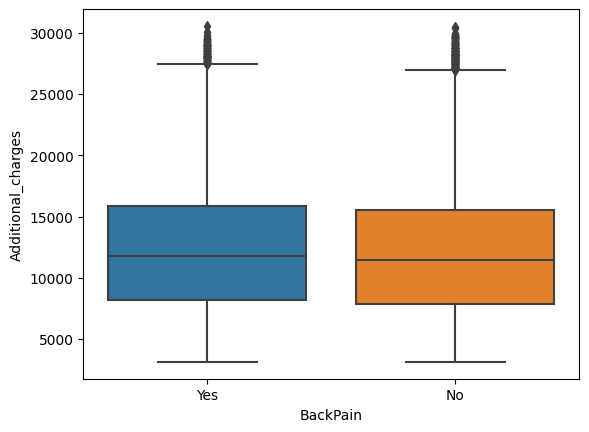

In [16]:
sns.boxplot(data=df, y='Additional_charges', x='BackPain');

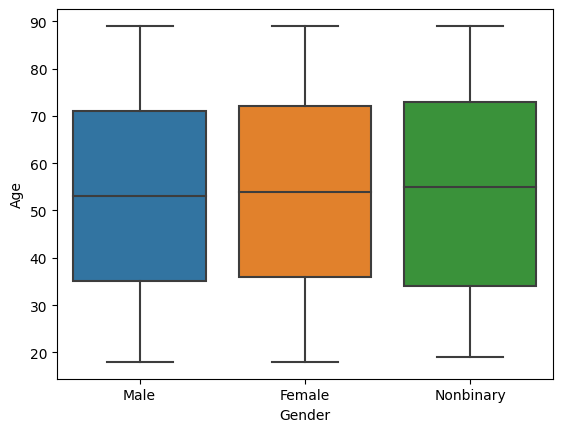

In [18]:
sns.boxplot(data=df, x='Gender', y='Age');

### E1: Results of Analysis

Based on the calculated p-value of 0.98, it is significantly higher than 0.05 so we fail to reject the null hypothese.  This is confirmed in the code  in section 'B1' that uses the '.describe().T' function, where the mean for  both group a and b are very close.

### E2: Limitations of Analysis

A limitation of using a t-test is that it assumped a normal distribution.  If the distribution is incorrectly assumed, the results may not be accurate.  The t-test also assumes that the a large sample size is used and that with a large sample size the distribution approaches a normal distribution bell shape.

### E3: Recommended Course of Action

The mean number of doctors visits are equal among patients that are readmitted and those that are not readmitted.  The hospital should continue to evaluate different variables provided in the data set to see if there are any relationships that can be identified to better predict readmissions.

### F: Provide a Panopto Recording

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=2be56fd6-8b2f-4303-9350-b03e015996fa

### G: Third-Party Code References
    
Sewell, Dr. William (unknown). <i>D206 - D207 Exploratory Data Analysis Webinar Episode 2<i> [Webinar].
    </br>&emsp;&emsp;Western Governors University. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=58f509ac-47df-4544-9f0a-aeb5016ab8f7

### H: References

No other sources were used.